In [1]:
#imports

import pandas as pd
from scipy.stats import linregress
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import numpy as np
import matplotlib.pyplot as plt

**Q. What is Linear Regression?**
<br />
<br />
Ans. Linear regression model is used to estimates the relationship between **one dependent** & **one dependent quantative** variables.
<br />
<br />
Eg: Some examples are...
<ol>
<li> Soil Erosion Vs water fall</li>
<li> Height Vs Shoe size</li>
</ol>


In [2]:
# Linear regression example:
df = pd.DataFrame([ 
    [165,36.5],
    [168, 37], 
    [172, 39.5],
    [174,37.5],
    [170, 37.5],
    [171,38], 
    [164,36], 
    [173, 38.5],
    [169, 37],
    [163, 37]
    ], columns=['Height', 'ShoeSize'])

In [3]:
df.corr()
# Positive correlation: If there is increase in the x (dependent) value,
#  increase in the y (independent) value.
# Negative/Inverse correlation: If there is decrease in the x (dependent) value,
#  decrease in the y (independent) value.

,Height,ShoeSize
Height,1.000000,0.741125
ShoeSize,0.741125,1.000000


In [4]:
# Formulas:
# Slope(m): n * (E(x)(y) - E(x)E(y)) / n * (E(x) * E(y))
# intercept(b): ( E(y) * m(E(x)) ) / n

lin_reg = linregress(df['Height'], df['ShoeSize'])
print("result", lin_reg)

result LinregressResult(slope=0.19525959367945825, intercept=4.470654627539503, rvalue=0.7411253770427022, pvalue=0.014178951245427696, stderr=0.06253677280900707, intercept_stderr=10.564921013099163)


In [5]:
# Calculation of given Height, get shoe size
# Formula: y = m x + c
# m = slope
# c = intercept
# x = given height to be calculated

given_height = 200
print(lin_reg.slope * given_height + lin_reg.intercept)
# Resultant is the approx shoe size/value with some residual

43.52257336343115


<AxesSubplot:xlabel='Height', ylabel='ShoeSize'>

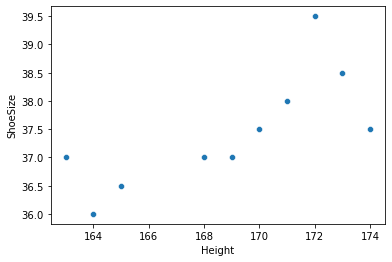

In [6]:
# plotting graph
# A. Scatter plot
sns.scatterplot(data=df, x='Height', y='ShoeSize')

<AxesSubplot:xlabel='Height', ylabel='ShoeSize'>

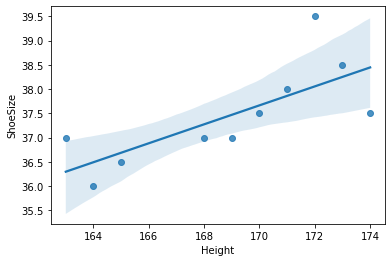

In [7]:
# B. Regression plot

sns.regplot(data=df, x='Height', y='ShoeSize')



---



**Q. How to Calculate the error in linear regression?**
<br />
<br />
Ans. A difference between the predicted value and actual value is called **residual**. One of main important assumption of regression analysis is the normal distribution of residual with **mean is equal to 0**, ie., residual must be positive and negative.
<br/>
<b>Formula</b> RSS (Residual Sum of Squares): 
<br/>
<h2>Calculating Residuals</h2>
Knowing that
i = y(i) − ^y(i)
<br />
^y(i) = m x + b

In [8]:
# Demo calculating residual value

given_height = 165
actual_shoe_size = 36.5
r_shoe_size = lin_reg.slope * given_height + lin_reg.intercept
print("Residual value:", actual_shoe_size - r_shoe_size)

Residual value: -0.18848758465011173




---

**Q. Difference between Loss and Cost function?**
<br/>
Ans. 
<br/>
**Loss Function:** The Loss function quantifies how much a model function's prediction ^y = f(x) deviates from the ground truth y = y(x), we calculate loss on the single object in the training or test sets
<br/>
Examples:
<ul>
<li> MSE: Mean Square Error</li>
<li> MAE: Mean Absolute Error</li>
</ul>


**Cost Function:** The cost function measure the model's error on a group of objects.
<br/>
Examples:
<ul>
<li> Average Square Loss.</li>
</ul>

**Object Functions:** The object these functions is not to minimize the cost/loss over training data, is to avoid **overfitting**



---


**Q. Difference between MSE & MAE & RMSE functions?**

**Description:** 
<ul>
<li>MAE (Mean Absolute Error): It represents the differences the average of the absolute difference betweeen the actual and predicted values in the dataset</li>
<li>MSE (Mean Square Error): It represents the average of the squared difference between original and predicted values in the dataset.</li> 
<li>RMSE (Root Mean Square Error): It is the square root of mean square error i.e., it measures the standard deviation of residuals</li>
</ul>

**Examples:**

In [9]:
# MAE(Mean Absolute Error):
# 1/N E(i=1 to N) |y(i) - ^y|

print("Mean Absolute Error (MAE), value: ", mean_absolute_error(df['Height'], df['ShoeSize']))

Mean Absolute Error (MAE), value:  131.45


In [10]:
# MSE(Mean Square Error):
# 1/N E(i=1 to N) (y(i) - ^y)**2

print("Mean Squared Error (MSE), value: ", mean_squared_error(df['Height'], df['ShoeSize']))

Mean Squared Error (MSE), value:  17288.125


In [11]:
# RMSE(Root Mean Square Error):
# Square root (1/N E(i=1 to N) (y(i) - ^y)**2)
MSE = mean_squared_error(df['Height'], df['ShoeSize'])
print("Root Mean Squared Error (RMSE), value: ", math.sqrt(MSE))

Root Mean Squared Error (RMSE), value:  131.48431465387802




---



**Explain how `Gradient Descent` works in `Linear Regression`** ?

Ans.

**Simple definition:** A grident simply measures the change in all weights with regard to the change in error ie., gradient as the slope of a function. 

The higher gradient, the steeper the slope and the faster a model can learn. But if the slope is zero, the model stops learning

**Gradient descent used to optimze the following:**
<ul>
<li><b>Linear Regression:</b> Optimizing interpect and slope</li>
<li><b>Logistic regression:</b> Optimizing the squiggle</li>
<li><b>t-sne:</b> Optimizing a cluster</li>
</ul>

In [13]:
# Example:
# Basic formula:
# ^y = mx + b
# loss = (y - ^y) ** 2 /N

numvals = 50

# initial values of slope and intercept
m, b = 0, 0 

# initial learning rate is 0.01
learning_rate = 0.01

x = np.sort( 5 * (np.random.random(numvals) - 0.5))
y = m * (x + x**2) + np.random.normal(0, 0.1, numvals)

print('X coordinates', x)
print('y coordinates', y)

X coordinates [-2.49818611 -2.36472826 -2.19586301 -1.85838356 -1.8417288  -1.82431809
 -1.81211954 -1.76663072 -1.5953726  -1.5711134  -1.39179158 -1.38671449
 -1.29767872 -1.29434063 -1.15506188 -0.96945466 -0.95890504 -0.91441629
 -0.77509122 -0.62394683 -0.50153646 -0.47565528 -0.3356763  -0.2209616
 -0.11586463 -0.08668605 -0.05583959  0.01759048  0.20614884  0.42180209
  0.42783751  0.68572053  0.73839942  0.75450308  0.90098815  1.21403632
  1.28274228  1.38853928  1.39577362  1.48829284  1.62734201  1.88426483
  2.03623701  2.09577151  2.14214351  2.20878899  2.33144854  2.37600831
  2.42775621  2.43075475]
y coordinates [-2.03105187e-02 -2.52730357e-03 -6.42633845e-03 -6.84416646e-02
 -4.06060597e-02  4.25020439e-02  1.11150735e-02 -6.51263452e-02
  5.94440376e-02 -6.61611899e-02 -8.17894674e-03  1.26464730e-01
  2.98211598e-02 -2.25442921e-01 -3.65181542e-02 -2.16324264e-01
 -2.78749782e-01  4.69742353e-02  4.63513912e-02  3.51690029e-02
  1.42248910e-01 -7.73751782e-02  6.86

Text(0.5, 1.0, 'Data')

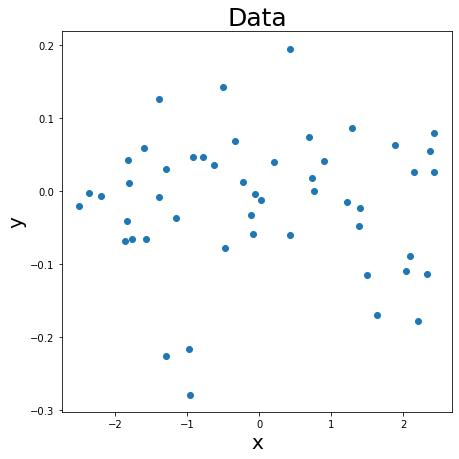

In [14]:
# Plotting scatter graph

plt.figure(figsize=(7, 7))
plt.scatter(x, y)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Data', fontsize=25)

In [15]:
# basic gradient descent functional approach

def descend(x, y, m, b, learning_rate): 
    dldw = 0.0 
    dldb = 0.0 
    N = x.shape[0]
    # loss = (y-(wx+b)))**2
    for xi, yi in zip(x,y): 
       dldw += -2*xi*(yi-(m*xi+b))
       dldb += -2*(yi-(m*xi+b))
    
    # Make an update to the w parameter 
    m = m - learning_rate*(1/N)*dldw
    b = b - learning_rate*(1/N)*dldb
    return m, b


In [16]:
# Iteratively make updates
for epoch in range(200): 
    m, b = descend(x,y,m,b,learning_rate)
    yhat = m*x + b
    loss = np.divide(np.sum((y-yhat)**2, axis=0), x.shape[0]) 
    print(f'{epoch} loss is {loss}, paramters m:{m}, b:{b}')

0 loss is 0.008753767883366972, paramters m:-1.5506364578032386e-05, b:-0.00032670859450041763
1 loss is 0.008743598313588155, paramters m:-3.0251174718293556e-05, b:-0.000646879327683135
2 loss is 0.00873383287487422, paramters m:-4.426957003392315e-05, b:-0.0009606431379710734
3 loss is 0.00872445543930635, paramters m:-5.759510934957618e-05, b:-0.0012681283366579314
4 loss is 0.008715450528441936, paramters m:-7.025984103824987e-05, b:-0.0015694606608268856
5 loss is 0.00870680328665941, paramters m:-8.229437024371115e-05, b:-0.001864763325194183
6 loss is 0.008698499455639483, paramters m:-9.37279231261232e-05, b:-0.0021541570728998674
7 loss is 0.008690525349930775, paramters m:-0.00010458840826239674, b:-0.0024377602252674043
8 loss is 0.008682867833550606, paramters m:-0.00011490247532698562, b:-0.0027156887305535052
9 loss is 0.008675514297574042, paramters m:-0.00012469557117329862, b:-0.002988056211708993
10 loss is 0.008668452638666791, paramters m:-0.00013399199343059253, b



---


**Explain the term intercept?**

Ans. The intercept (sometimes called the "constant")in a regression model represents the mean value of the response variable when all of the predictor variables in the model are equal to zero.

Formula:

**Simple linear regression: ŷ = β0 + β1(x)**


<ul>
<li>ŷ: The predicted value for the response variable</li>
<li>β0: The mean value of the response variable when x = 0</li>
<li>β1: The average change in the response variable for a one unit increase in x</li>
<li>x: The value for the predictor variable</li>
</ul>

**Multiple Linear Regression: ŷ = β0 + β1(x1) + β2(x2) + β3(x3) + … + βk(xk)**
<ul>
<li>ŷ: The predicted value for the response variable</li>
<li>β0: The mean value of the response variable when all predictor variables are zero</li>
<li>βj: The average change in the response variable for a one unit increase in the jth predictor variable, assuming all other predictor variables are held constant</li>
<li>xj: The value for the jth predictor variable</li>
</ul>



---



**Q. Write all the assumptions for linear regression?**

Ans. 
<ul>
<li>Linear relationship</li>
<li>Independence</li>
<li>Homoscedasticity</li>
<li>Normality</li>
</ul>


**Linear relationship:** There exists a linear relationship between the independent variable, x, and the dependent variable, y.

If assumption is voilated:
<ul>
<li>Apply a non-linear transformation to the independent and/or dependent variable. </li>
<li>Add another independent variable to the model.</li>
</ul>

**Independence:** The residuals are independent. In particular there is no correlation between consecutive residuals in time series data.

If assumption is voilated:
<ul>
<li>Positive serail correlation, consider adding lags of the dependent and/or independent variable to the model. Common examples include taking the log, the square root or the reciprocal of the independent and/or dependent variable</li>
<li>Negative serail correlation, check to make sure that none of your variables are overdifferenced.</li>
<li>Categorial correlation, consider adding categorial dummy variable to the model.</li>
</ul>

**Homoscedasticity:** The residuals have constant variance at every level of x.

If assumption is voilated:
<ul>
<li>Transform the dependent variable</li>
<li>Redefine the dependent variable</li>
<li>Use weighted regression</li>
</ul>

**Normality:** The residuals of the model are normally distributed.

If assumption is voilated:
<ul>
<li>Verify that any outliers aren't having a huge impact on the distribution.</li>
<li>Make sure of no erroneous data</li>
<li>Try applying a nonlinear transformation to the independent and/or dependent variable. Common example include taking the log, the square root, or the reciprocal of the independent and/or dependent variable.</li>
</ul>



---


**Q. Hypothesis testing in Linear Regression?**

Ans. 
<ul>
<li>By creating the linear regression model, we are establishing a new truth about the relationship between dependent variable with one or more independent variables.</li>
<li>In order to justify the truth, there are needed one or more tests. These tests can be termed as an act of testing the truth using hypothesis testing</li>
<li>T-test is used to verify the relationsip between the dependent and independent variables</li>
<li>F-test is used to test the linear regression model</li>
</ul>

Steps to perform **Hypothesis tests & Linear Regression Models**

<ul>
<li>
Formulate null and alternative hypothesis:
<ul>
<li><b>T-tests:</b> Thus, the null hypothesis is set that there is no relationship between independent variable and the predicted variable
</li>
<li><b>F-tests:</b> The null hypothesis is that the linear regression model doesnot exists.
</li>
</ul>
</li>

<li>
Determine the test statistics:
<ul>
<li>T-test for hypotheses related to individual coefficients</li>
<li>F-test for hypothesis for linear regression model</li>
</ul>
</li>

<li>
Make decision: Based on the values of t-statistics and f-statistics, the decision regarding the linear regression model is taken
</li>

<li>
Draw conclusions.
</li>

</ul>



---


**Q. How would you decide the importance of variable for the multivariant regression?**

Ans. It is defined as a process of involving multiple dependent variables resulting in one outcome. 

The significance of multivariant analysis is helpful in effectively minimizing the bias.

**Objective of multivariant analysis:**
<ul>
<li>Data reduction or structural simplification</li>
<li>Sorting and grouping</li>
<li>Investigation of dependence among variables</li>
<li>Prediction relationship between variables</li>
<li>Hypothesis construction and testing</li>
</ul>

**Some categories of multivariant analysis:**
<ul>
<li>Cluster analysis</li>
<li>Multiple Logistic Regression</li>
<li>Multivariate Analysis of Varaiance</li>
</ul>

**Model Assumptions:**
Normality, Homoscedasticity, linearity and independence(the absence of correlated errors).

<b>Example:</b> Based on the season we cannot predict the weather of any given year. Several factors play an important role in predicting the **weather**.


**Drawbacks:**
<ul>
<li>This technique involve the use of complex statistical programs that are very expensive</li>
</ul>



---


**Q. Difference between R-Square and Adjusted R-Square?**


Ans: 
<ul>
<li>R-Square: Residual Sum of Squares.</li>
<li>Adjusted R-Square: Adjusted Residual Sum of Squares.</li>
</ul>

**R-Square:** It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

**Adjusted R-Squared:** It is a modified version of R-squared that has been adjusted for the number of predictors in the model.
Adding more independent variables or predictors to a regression model tends to increase the R-squared value, which tempts markers of the model to add even more variables. This is called overfitting and can return an unwarranted high R-Squared value. Adjusted R-squared is used to determine how reliable the correlation is and how much it is determined by the addition of independent variables 

**Formula:**

R Square(Coefficient of determination): 

1 - (Sum of squares of residuals/total sum of square)

<b>Sum of Squares of Residuals(RSS): E(i=1 to n) (y(i) - f(x(i)))**2</b>
<ul>
<li>y(i): i^th value of the variable to be predicted</li>
<li>f(x(i)): predicted value of y(i)</li>
<li>n: number of observations</li>
</ul>

<b>Total Sum of Square(TSS): E(i=1 to n) (y(i) - ^y)**2</b>
<ul>
<li>n: number of observations</li>
<li>y(i): value in a sample</li>
<li>^y: mean value of a sample</li>
</ul>

<b>Adjust R Square: 1-( (1-R**2)(N-1)/(N-K-1) )</b>

R**2 is the actual r square value

N: Number of data points

K: Indepenedent variable

**R-Squared Vs Adjusted R-Squared**

The Adjusted R-Squared considers and tests different independent variables against the model, where as R-Squared not.